In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

from catboost import CatBoostRegressor

In [154]:
df = pd.read_csv("Data/covid.csv")

# Data Exploration

In [155]:
df.shape

(566602, 23)

In [156]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [157]:
df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [158]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [160]:
# How many female patients are pregnant

x = df.loc[(df.sex == 1) & (df.pregnancy == 1)]
print(len(x))

4063


In [161]:
# How many Covid positive patients were tobacco users

x = df.loc[(df.covid_res == 2) & (df.tobacco == 1)]
print(len(x))

25846


# Finding value counts of categorical variables

CLAVE	DESCRIPCIÓN
1	YES
2	NO
97	Not Applicable
98	Ignore
99	Not Specified

1	Female
2	Male
99	Not Specified

In [162]:
# Create a subset of categorical variables only
subset = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [163]:
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [164]:
# Removing rows that have covid_res= 3 meaning 'pending'
index_names = df[ df['covid_res'] == 3 ].index
df.drop(index_names, inplace = True)

In [165]:
# Checking value_counts of covid_res column
df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [166]:
# Change date_died column to categorical data "9999-99-99" to 0 and row with date to 1
df.loc[df.date_died == "9999-99-99", "date_died"] = 0

In [167]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [168]:
df.loc[df.date_died != 0, "date_died"] = 1

In [169]:
df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [170]:
df['date_died'].value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

In [171]:
df["date_died"] = df["date_died"].astype("int64")

# Machine Learning

In [172]:
#df = df.sample(n=10000)

In [173]:
# Create our features
#X = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])
X = df.drop(columns= ['covid_res', 'date_died', 'entry_date', 'date_symptoms', 'id', 'age', 'patient_type', 
                     'intubed', 'icu', 'pneumonia','other_disease','sex'])

# Create our target
#y = df['date_died']
y = df['intubed']

In [174]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(449722, 11) (49970, 11) (449722,) (49970,)


In [175]:
X.dtypes

pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
dtype: object

In [176]:
categorical_features_indices = np.where(X.dtypes != np.float64)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [177]:
y.value_counts()

97    392146
2      98321
1       9103
99       122
Name: intubed, dtype: int64

# Cat Boost Classifier

In [178]:
X.dtypes

pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
dtype: object

In [180]:
from catboost import CatBoostClassifier

In [181]:
cat_features_index = np.where(X.dtypes != float)[0]
cat_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [182]:
# cat_model = CatBoostClassifier(custom_loss=['Accuracy'],random_seed=42)
cat_model = CatBoostClassifier(iterations=10, verbose=10)


## Set the metric for evaluation -- original code
# cat_model = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True,  random_seed=42) 

cat_model.fit(X_train, y_train, cat_features=cat_features_index, eval_set=(X_test, y_test), plot=True)

# model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.7705978	test: 0.7703118	best: 0.7703118 (0)	total: 1.32s	remaining: 11.9s
9:	learn: 0.4901958	test: 0.4877434	best: 0.4877434 (9)	total: 6.38s	remaining: 0us

bestTest = 0.4877433728
bestIteration = 9



In [183]:
print(cat_model.predict_proba(X_test))

[[0.0091655  0.05767553 0.9319302  0.00122878]
 [0.02546966 0.18089347 0.79215852 0.00147835]
 [0.02741928 0.61614138 0.35370878 0.00273056]
 ...
 [0.00565984 0.0417936  0.95133712 0.00120944]
 [0.01451684 0.12023849 0.86384047 0.0014042 ]
 [0.01451684 0.12023849 0.86384047 0.0014042 ]]


In [184]:
print(cat_model.predict(X_test))

[[97]
 [97]
 [ 2]
 ...
 [97]
 [97]
 [97]]


In [185]:
test_preds = cat_model.predict(X_test)
train_preds = cat_model.predict(X_train)

print("\nTest  Accuracy : %.2f"%cat_model.score(X_test, y_test))
print("Train Accuracy : %.2f"%cat_model.score(X_train, y_train))


Test  Accuracy : 0.81
Train Accuracy : 0.81


In [186]:
from catboost import cv
from sklearn.metrics import accuracy_score

print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test, cat_model.predict(X_test))))

the test accuracy is :0.807665


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'contact_other_covid'),
  Text(1, 0, 'diabetes'),
  Text(2, 0, 'hypertension'),
  Text(3, 0, 'pregnancy'),
  Text(4, 0, 'inmsupr'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'renal_chronic'),
  Text(7, 0, 'cardiovascular'),
  Text(8, 0, 'asthma'),
  Text(9, 0, 'obesity'),
  Text(10, 0, 'tobacco')])

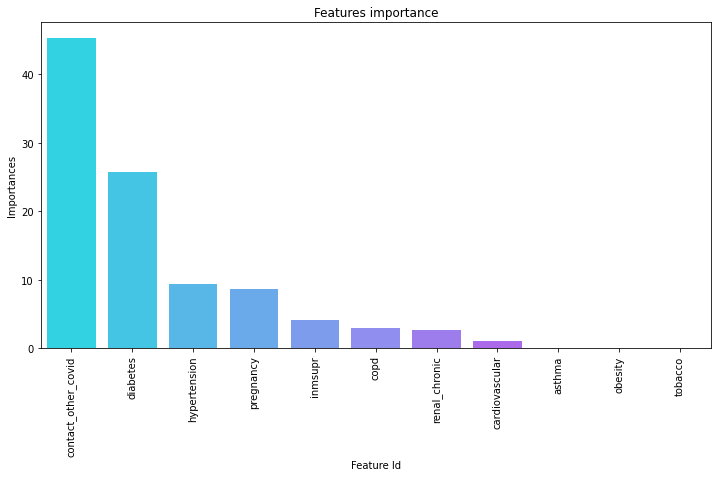

In [187]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Feature Id", y="Importances", data=df_feature_importance,palette="cool");
plt.title('Features importance');
plt.xticks(rotation=90)

In [188]:
cat_model_new = CatBoostClassifier(
    iterations=100,
    random_seed=123,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

cat_model_new.fit(
    X_train, y_train,
    cat_features=cat_features_index,
    eval_set=(X_test, y_test),
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7763497	test: 0.7767249	best: 0.7767249 (0)	total: 365ms	remaining: 36.1s
1:	learn: 0.6586312	test: 0.6590987	best: 0.6590987 (1)	total: 654ms	remaining: 32s
2:	learn: 0.5831685	test: 0.5836796	best: 0.5836796 (2)	total: 1.01s	remaining: 32.7s
3:	learn: 0.5524012	test: 0.5527863	best: 0.5527863 (3)	total: 1.26s	remaining: 30.2s
4:	learn: 0.5292108	test: 0.5291314	best: 0.5291314 (4)	total: 1.79s	remaining: 33.9s
5:	learn: 0.5148288	test: 0.5140795	best: 0.5140795 (5)	total: 2.33s	remaining: 36.4s
6:	learn: 0.5045267	test: 0.5032350	best: 0.5032350 (6)	total: 3.02s	remaining: 40.1s
7:	learn: 0.4988016	test: 0.4969027	best: 0.4969027 (7)	total: 3.64s	remaining: 41.9s
8:	learn: 0.4945815	test: 0.4923800	best: 0.4923800 (8)	total: 4.2s	remaining: 42.4s
9:	learn: 0.4912932	test: 0.4890697	best: 0.4890697 (9)	total: 4.8s	remaining: 43.2s
10:	learn: 0.4897963	test: 0.4873263	best: 0.4873263 (10)	total: 5.36s	remaining: 43.4s
11:	learn: 0.4891181	test: 0.4865745	best: 0.4865745 (11

94:	learn: 0.4850295	test: 0.4835748	best: 0.4835079 (60)	total: 1m 2s	remaining: 3.3s
95:	learn: 0.4850253	test: 0.4835743	best: 0.4835079 (60)	total: 1m 3s	remaining: 2.64s
96:	learn: 0.4850229	test: 0.4835756	best: 0.4835079 (60)	total: 1m 4s	remaining: 1.98s
97:	learn: 0.4850206	test: 0.4835725	best: 0.4835079 (60)	total: 1m 4s	remaining: 1.32s
98:	learn: 0.4850148	test: 0.4835787	best: 0.4835079 (60)	total: 1m 5s	remaining: 662ms
99:	learn: 0.4850050	test: 0.4835770	best: 0.4835079 (60)	total: 1m 6s	remaining: 0us

bestTest = 0.4835079329
bestIteration = 60

Shrink model to first 61 iterations.


In [189]:
from catboost import cv
from sklearn.metrics import accuracy_score

print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test, cat_model_new.predict(X_test))))

the test accuracy is :0.809606


In [190]:
test_preds = cat_model_new.predict(X_test)
train_preds = cat_model_new.predict(X_train)

print("\nTest  Accuracy : %.2f"%cat_model_new.score(X_test, y_test))
print("Train Accuracy : %.2f"%cat_model_new.score(X_train, y_train))


Test  Accuracy : 0.81
Train Accuracy : 0.81


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'contact_other_covid'),
  Text(1, 0, 'diabetes'),
  Text(2, 0, 'hypertension'),
  Text(3, 0, 'pregnancy'),
  Text(4, 0, 'inmsupr'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'renal_chronic'),
  Text(7, 0, 'cardiovascular'),
  Text(8, 0, 'asthma'),
  Text(9, 0, 'obesity'),
  Text(10, 0, 'tobacco')])

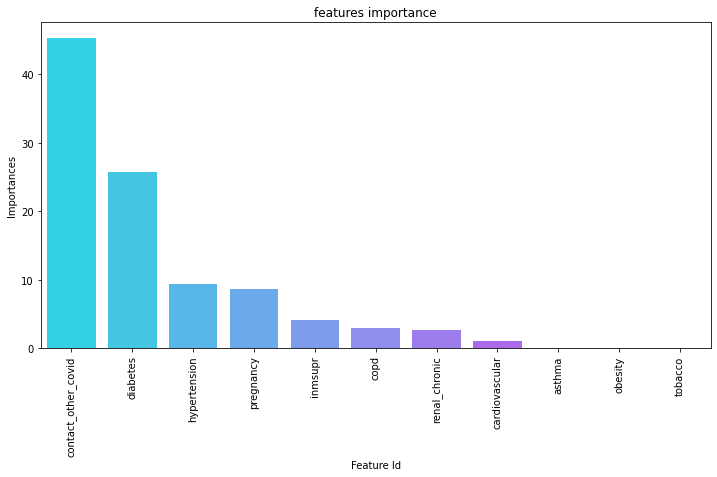

In [191]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
# horizontal
# feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
# vertical
feature_plot= sns.barplot(x="Feature Id", y="Importances", data=df_feature_importance,palette="cool");
plt.title('features importance');
plt.xticks(rotation=90)

In [192]:
df_feature_importance

,Feature Id,Importances
0,contact_other_covid,45.321436
1,diabetes,25.675949
2,hypertension,9.454814
3,pregnancy,8.693117
4,inmsupr,4.097800
5,copd,2.983047
6,renal_chronic,2.670373
7,cardiovascular,1.103464
8,asthma,0.000000
9,obesity,0.000000
